<a href="https://colab.research.google.com/github/phanmanhtung/Machine-Learning-and-Data-Mining-2/blob/master/Weather_Forecasting_(DSML_final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/ggcolab/'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# Read the data frame and save it

df = pd.read_csv("/content/gdrive/My Drive/hourly.csv", delimiter=';', skiprows=11)
df.head(5)

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Sunshine Duration [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
0,2020,2,16,0,0,13.94,0.0,-999.0,10.00,16.26
1,2020,2,16,1,0,13.12,0.0,0.0,9.92,12.22
2,2020,2,16,2,0,13.01,0.1,0.0,9.71,11.89
3,2020,2,16,3,0,12.59,0.1,0.0,9.63,12.59
4,2020,2,16,4,0,11.35,0.2,0.0,9.60,14.47


In [0]:
# Create datetime columns, set to indexes
df['Date']=pd.to_datetime(df[['Year','Month','Day','Hour','Minute']])
df.set_index("Date", inplace=True)

# Get rid of these columns
df.drop(['Year','Month','Day','Hour','Minute'], axis=1, inplace=True)

In [0]:
df.head()

,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Sunshine Duration [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
Date,,,,,
2020-02-16 00:00:00,13.94,0.0,-999.0,10.00,16.26
2020-02-16 01:00:00,13.12,0.0,0.0,9.92,12.22
2020-02-16 02:00:00,13.01,0.1,0.0,9.71,11.89
2020-02-16 03:00:00,12.59,0.1,0.0,9.63,12.59
2020-02-16 04:00:00,11.35,0.2,0.0,9.60,14.47


In [0]:
print(df.shape) # We recommend a dataset with over 2000 data points
print(list(df))

(360, 5)
['Temperature  [2 m above gnd]', 'Total Precipitation (high resolution)  [sfc]', 'Sunshine Duration  [sfc]', 'Wind Speed  [10 m above gnd]', 'Wind Direction  [10 m above gnd]']


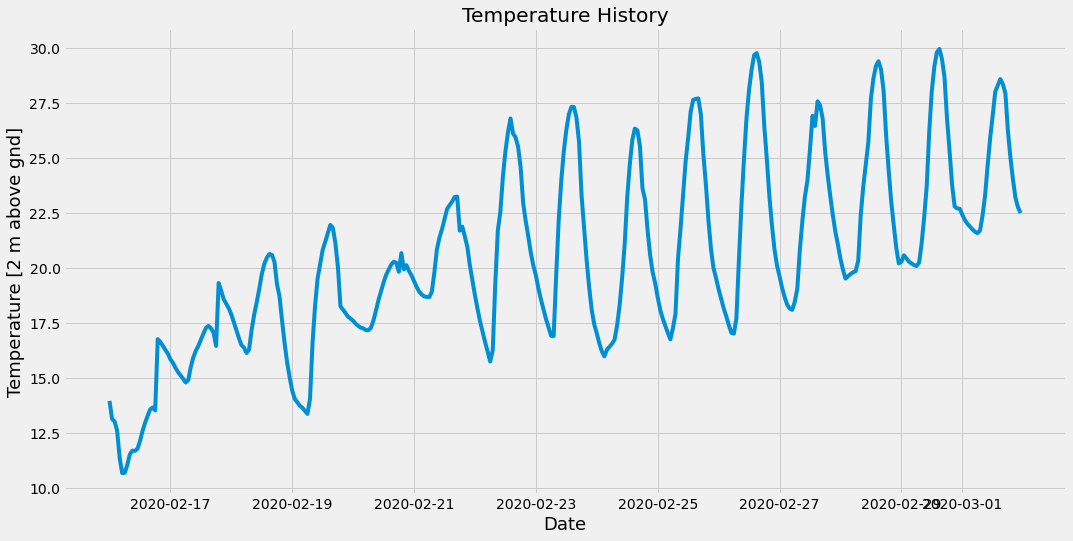

In [0]:
#Visualize temperature history
plt.figure(figsize=(16,8))
plt.title('Temperature History')
plt.plot(df["Temperature  [2 m above gnd]"])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Temperature [2 m above gnd]', fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Temp' column
data = df.filter(['Temperature  [2 m above gnd]'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

288

In [0]:
#Scale the data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.70124481e-01],
       [1.27593361e-01],
       [1.21887967e-01],
       [1.00103734e-01],
       [3.57883817e-02],
       [0.00000000e+00],
       [5.18672199e-04],
       [1.91908714e-02],
       [4.40871369e-02],
       [5.29045643e-02],
       [5.23858921e-02],
       [5.70539419e-02],
       [7.52074689e-02],
       [9.90663900e-02],
       [1.18257261e-01],
       [1.34854772e-01],
       [1.49896266e-01],
       [1.54564315e-01],
       [1.47821577e-01],
       [3.15871369e-01],
       [3.09128631e-01],
       [3.00311203e-01],
       [2.90456432e-01],
       [2.81639004e-01],
       [2.68153527e-01],
       [2.59854772e-01],
       [2.47925311e-01],
       [2.38070539e-01],
       [2.30290456e-01],
       [2.22510373e-01],
       [2.13692946e-01],
       [2.18879668e-01],
       [2.49481328e-01],
       [2.72302905e-01],
       [2.88381743e-01],
       [2.99792531e-01],
       [3.14315353e-01],
       [3.28838174e-01],
       [3.42323651e-01],
       [3.46991701e-01],


In [0]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
  x_train.append(train_data[i-30:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 31:
    print(x_train)
    print(y_train)
    print()

[array([0.17012448, 0.12759336, 0.12188797, 0.10010373, 0.03578838,
       0.        , 0.00051867, 0.01919087, 0.04408714, 0.05290456,
       0.05238589, 0.05705394, 0.07520747, 0.09906639, 0.11825726,
       0.13485477, 0.14989627, 0.15456432, 0.14782158, 0.31587137,
       0.30912863, 0.3003112 , 0.29045643, 0.281639  , 0.26815353,
       0.25985477, 0.24792531, 0.23807054, 0.23029046, 0.22251037])]
[0.2136929460580913]

[array([0.17012448, 0.12759336, 0.12188797, 0.10010373, 0.03578838,
       0.        , 0.00051867, 0.01919087, 0.04408714, 0.05290456,
       0.05238589, 0.05705394, 0.07520747, 0.09906639, 0.11825726,
       0.13485477, 0.14989627, 0.15456432, 0.14782158, 0.31587137,
       0.30912863, 0.3003112 , 0.29045643, 0.281639  , 0.26815353,
       0.25985477, 0.24792531, 0.23807054, 0.23029046, 0.22251037]), array([0.12759336, 0.12188797, 0.10010373, 0.03578838, 0.        ,
       0.00051867, 0.01919087, 0.04408714, 0.05290456, 0.05238589,
       0.05705394, 0.07520747, 0.0

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(258, 30, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





258/258 [==============================] - 12s 47ms/step - loss: 0.0338


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.2970585875174234

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


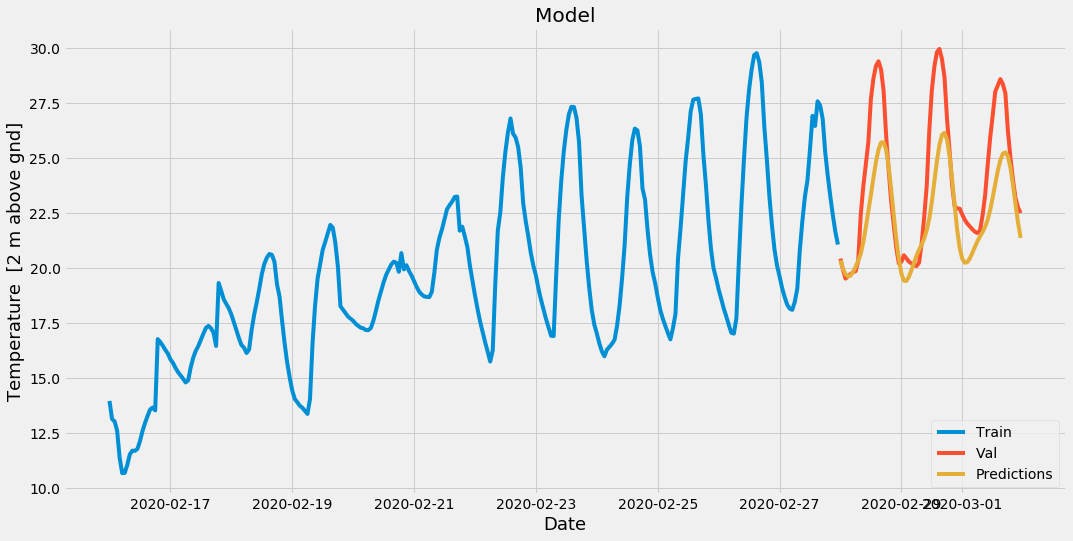

In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Temperature  [2 m above gnd]', fontsize=18)
plt.plot(train['Temperature  [2 m above gnd]'])
plt.plot(valid[['Temperature  [2 m above gnd]', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()